#### Step by Step implementation

#### Import the required libraries

In [1]:
# import numpy package for arrays,lists of lists of numbers
import numpy as numpy
# pandas "excel for python", good for spreadsheets and dataframes
import pandas as pd
#sklearn the library for data mining
import sklearn as sklearn
import sklearn.linear_model as lin
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
# import matplotlib.pyplot for plotting  
import matplotlib.pyplot as plt 
#magic function, renders the plots in this notebook
%matplotlib inline

 

#### Import and investigate the dataset

In [2]:
powerproduction=pd.read_csv("powerproduction.csv")
powerproduction.describe()
#print(powerproduction)

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


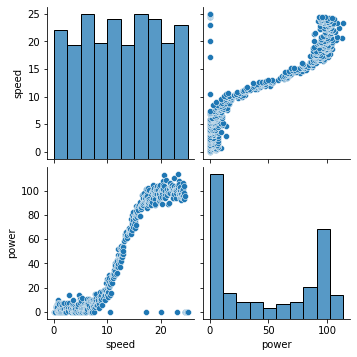

In [3]:
sns.pairplot(powerproduction)

#### Observations

I can observe several null values in the dataset and the pairplot.  
 
Wind turbines are designed to operate within particular parameters. The "cut-in" and "cut-out" speeds are decided on prior to construction.  It takes a particular wind speed to maintain the movement of the rotor blades and generate power.  A high wind speed will cause damage to the mechanisms.

I have decided that the best way to accurately predict is to remove the null values.  The majority of these fall on either side of the cut in/cut out values. The other more randomly distributed null values can be there for arbitrary reasons. To include this outlying data will take away from the overall upward trajectory - wind blows fast and turbine goes fast too.
This graph from University of Calgary's [Energy Education pages](https://energyeducation.ca/encyclopedia/Wind_power) supports this theory.
![](WindPowerCurve.jpg)

#### Clean the data

In [4]:
#Code adapted from https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df=powerproduction
cleanpower = df[df.loc[:]!=0].dropna()
#cleanpower
cleanpower_csv_data = cleanpower.to_csv('cleanpower.csv', index = False) 
cleanpower.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


#### Train the model, Score it and analyze the accuracy



In this step, I'll introduce regression - a fundamental concept in Machine Learning.
Regression is where the relationship between variables is interrogated to reveal the line that best describes it.  Once this can be ascertained, a pre-existing equation can be used to make predictions. <br>
This might be surprising to somebody who comes to ML believing it to be technology native to the 21st century and their dataset which they believe to be unique.  <br>
Machine Learning is built upon hundreds years of academic explorations in maths and statistics where the theory of numbers and the behaviour of their distributions is well established.  <br>

A style of regression is chosen and the corresponding modelling from scikit learn can be applied to the data and used to test the hypothesis.
I will explore linear and polynomial regression below.

* Linear is a commonly used predictive analysis for continuous growth which may be suitable for the generation of power as the line grows, at a glance, in a straight-ish line.
* Polynomial is a form of linear regression and is useful where one variable is dependent on another.  That is the case in this scenario- windspeed affects the power generated.

In [5]:
#Divide the data set into X and y where X (windspeed) is the independent variable and y (power generated) is the dependent variable.
#This breakdown is applicable for both regression styles
speed = cleanpower.speed.to_numpy()
y = cleanpower.power.to_numpy()
X = speed.reshape(-1, 1)


#### Fit linear and polynomial regressions to the data.

In [6]:
#Code adapted from https://iq.opengenus.org/linear-regression-using-scikit-learn/
#fitting the linear regression model to the dataset

lin_reg=LinearRegression()
lin_reg.fit(X,y)

r = lin_reg.score(X,y)#find out the r value, how well the lines fits the data set

In [12]:
#fitting the polynomial regression model to the dataset

poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)


polyr = lin_reg2.score(X_poly,y)#find out the r value, how well the lines fits the data set

#### Analyse the accuracy using sklearn features

I've called score and intercept functions on the data to score the models that I have created.
The results show that the polynomial regression is a better fit for the data.

R is a value between 0 and 1, with one being the best result when the lines fit well with the data set.

In [13]:
print ("The linear regression score out of 1.0 is:\n",(r))
print ("The polynomial regression score out of 1.0 is:\n",(polyr))


The linear regression score out of 1.0 is:
 0.8984832870534454
The polynomial regression score out of 1.0 is:
 0.9790166581245356


#### Plot and Visualise Model Outputs


A plot is an excellent method to visualise the model outputs and really see why the polynomial regression is the better fit.

Text(0.5, 0.98, 'Power Production')

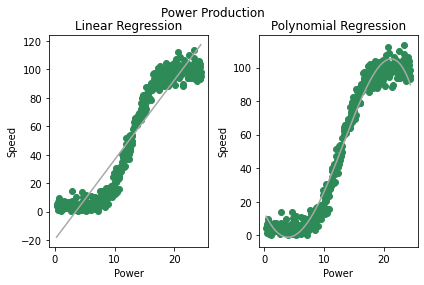

In [9]:
#Visualising the linear regression model results
plt.subplot(1,2,1)
plt.scatter(X,y,color='seagreen')
plt.plot(X,lin_reg.predict(X),color='darkgrey')
plt.title('Linear Regression')
plt.xlabel('Power')
plt.ylabel('Speed')

#Visualising the polynomial regression model results
plt.subplot(1,2,2)#2 is passed in so that this subplot will appear as the second one
X_grid=numpy.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='seagreen')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='darkgrey')
plt.title('Polynomial Regression')
plt.xlabel('Power')
plt.ylabel('Speed')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.suptitle('Power Production')

#### Predict
After the model is, view predictions by using the predict() function.
Calling predict function, the result can be cross referenced with the plots or the dataset to confirm it's accuracy.


In [20]:
print ("Predict the result with linear regression model\n When speed is 8.5 the power produced is:",(lin_reg.predict( ([ [8.5] ]) )))
print ("Predict the result with polynomial regression model\n When speed is 8.5 the power produced is:",( lin_reg2.predict( poly_reg.fit_transform(([ [8.5] ]) )) ))

Predict the result with linear regression model
 When speed is 8.5 the power produced is: [27.92235117]
Predict the result with polynomial regression model
 When speed is 8.5 the power produced is: [14.99865736]


In [23]:
#https://developer.ibm.com/technologies/artificial-intelligence/tutorials/deploy-a-python-machine-learning-model-as-a-web-service/
#Use pickle to export our model object as a binary, which can be used by the web service that will be created in the next step:
import pickle
# pickle.dump(lm, open("../deploy/linearmodel.pkl","wb"))
pickle.dump(lin_reg2, open("lin_reg2.pkl","wb"))

#### Turn the code into a function

## References 
Ayush Pant (2019)Introduction to Linear Regression and Polynomial Regression [Online] Available: https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb. [Accessed: December 12, 2020].

J.M.K.C. Donev et al. (2020). Energy Education - Wind power [Online]. Available: https://energyeducation.ca/encyclopedia/Wind_power. [Accessed: December 12, 2020].

Polynomial regression using scikit-learn [Online] Available: https://iq.opengenus.org/polynomial-regression-using-scikit-learn/ . [Accessed: December 12, 2020].



In [11]:
#### End.